Objective of this project is to determine days with anormal maximum and minimum temperatures in 2019 

In [ ]:
#importing necessary modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Dataset'i indir (örnek: weather dataset)
api.dataset_download_files('vonline9/weather-istanbul-data-20092019', path='.', unzip=True)



Dataset URL: https://www.kaggle.com/datasets/vonline9/weather-istanbul-data-20092019


In [6]:
df = pd.read_csv("Istanbul Weather Data.csv")

In [ ]:
# exploring data

In [8]:
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015
3,30.08.2019,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016
4,29.08.2019,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015


In [10]:
df.tail()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
3891,05.01.2009,Overcast,4.32,5,3,08:29:00,17:50:00,0:41:00,1:57:00,15,97,1015
3892,04.01.2009,Mist,2.91,5,3,08:29:00,17:49:00,0:15:00,12:48:00,9,94,1014
3893,03.01.2009,Overcast,0.08,5,3,08:29:00,17:48:00,11:52:00,NaN,16,94,1021
3894,02.01.2009,Overcast,4.48,4,1,08:29:00,17:48:00,11:30:00,23:43:00,12,89,1021
3895,01.01.2009,Partly cloudy,0.23,5,2,08:29:00,17:47:00,11:9:00,22:39:00,10,90,1027


In [20]:
df.shape

(3896, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     3896 non-null   object 
 1   Condition    3896 non-null   object 
 2   Rain         3896 non-null   float64
 3   MaxTemp      3896 non-null   int64  
 4   MinTemp      3896 non-null   int64  
 5   SunRise      3896 non-null   object 
 6   SunSet       3896 non-null   object 
 7   MoonRise     3764 non-null   object 
 8   MoonSet      3765 non-null   object 
 9   AvgWind      3896 non-null   int64  
 10  AvgHumidity  3896 non-null   int64  
 11  AvgPressure  3896 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 365.4+ KB


In [24]:
df.nunique()

DateTime       3896
Condition        26
Rain            550
MaxTemp          38
MinTemp          32
SunRise         178
SunSet          185
MoonRise       1343
MoonSet        1349
AvgWind          50
AvgHumidity      57
AvgPressure      44
dtype: int64

In [26]:
df.describe()

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
count,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000
mean,0.946794,18.084189,13.774897,16.989220,71.414784,1015.281314
std,2.558308,7.613318,6.865021,7.950417,9.483500,6.284232
min,0.000000,-3.000000,-5.000000,2.000000,40.000000,992.000000
25%,0.000000,12.000000,8.000000,11.000000,65.000000,1011.000000
50%,0.010000,18.000000,14.000000,16.000000,71.000000,1015.000000
75%,0.720000,25.000000,20.000000,22.000000,78.000000,1019.000000
max,42.000000,37.000000,26.000000,56.000000,97.000000,1038.000000


In [ ]:
# Data cleaning

In [14]:
df.isnull().sum()

DateTime         0
Condition        0
Rain             0
MaxTemp          0
MinTemp          0
SunRise          0
SunSet           0
MoonRise       132
MoonSet        131
AvgWind          0
AvgHumidity      0
AvgPressure      0
dtype: int64

ı think these columns are not so important for my project so ı just going to ignore them

I want to find days with unusual maximum and minimum heat levels in  2019

In [ ]:
# Preparing data for time series analysis

In [34]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format = "%d.%m.%Y")

In [36]:
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day

In [38]:
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,year,month,day
0,2019-09-02,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012,2019,9,2
1,2019-09-01,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011,2019,9,1
2,2019-08-31,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015,2019,8,31
3,2019-08-30,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016,2019,8,30
4,2019-08-29,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015,2019,8,29


In [ ]:
# creating a dataframe for maximum temp

In [42]:
stats1 = df.groupby(["month","day"])["MaxTemp"].agg(["mean","std"]).reset_index()
stats1.columns =  ["month","day","max_temp_mean","max_temp_std"]

In [82]:
stats1.head()

,month,day,max_temp_mean,max_temp_std
0,1,1,7.909091,4.459923
1,1,2,7.909091,3.780332
2,1,3,8.181818,2.561959
3,1,4,7.545455,2.504541
4,1,5,7.818182,2.315953


In [ ]:
# creating dataframe for minimum temp

In [50]:
stats2 = df.groupby(["month","day"])["MinTemp"].agg(["mean","std"]).reset_index()
stats2.columns =  ["month","day","min_temp_mean","min_temp_std"]

In [84]:
stats2.head()

,month,day,min_temp_mean,min_temp_std
0,1,1,5.545455,3.387141
1,1,2,5.363636,3.775519
2,1,3,5.090909,3.080732
3,1,4,5.818182,2.272364
4,1,5,5.727273,2.611165


In [ ]:
# adding necessary columns into original dataframe

In [52]:
df["max_temp_std"] = stats1["max_temp_std"]
df["max_temp_mean"] = stats1["max_temp_mean"]
df["min_temp_std"]  = stats2["min_temp_std"]
df["min_temp_mean"] = stats2["min_temp_mean"]

In [ ]:
# calculating z scores

In [60]:
df['z_score_max'] = (df['MaxTemp'] - df['max_temp_mean']) / df['max_temp_std']
df["z_score_min"] = (df["MinTemp"] - df["min_temp_mean"]) / df["min_temp_std"]

In [62]:
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,...,AvgPressure,year,month,day,max_temp_std,max_temp_mean,min_temp_std,min_temp_mean,z_score_max,z_score_min
0,2019-09-02,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,...,1012,2019,9,2,4.459923,7.909091,3.387141,5.545455,4.280547,4.857945
1,2019-09-01,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,...,1011,2019,9,1,3.780332,7.909091,3.775519,5.363636,5.050062,4.406378
2,2019-08-31,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,...,1015,2019,8,31,2.561959,8.181818,3.080732,5.090909,6.954904,5.488660
3,2019-08-30,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,...,1016,2019,8,30,2.504541,7.545455,2.272364,5.818182,7.767708,7.121139
4,2019-08-29,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,...,1015,2019,8,29,2.315953,7.818182,2.611165,5.727273,8.282474,6.614951


In [ ]:
# creating dataframes for days with extreme temp values

In [66]:
extreme_2019_max = df[(df['year'] == 2019) & (df['z_score_max'] > 2)] 
extreme_2019_min = df[(df['year'] == 2019) & (df['z_score_min'] > 2)]

In [72]:
print(extreme_2019_max[['DateTime', 'MaxTemp', 'max_temp_mean', 'max_temp_std', 'z_score_max']])

      DateTime  MaxTemp  max_temp_mean  max_temp_std  z_score_max
0   2019-09-02       27       7.909091      4.459923     4.280547
1   2019-09-01       27       7.909091      3.780332     5.050062
2   2019-08-31       26       8.181818      2.561959     6.954904
3   2019-08-30       27       7.545455      2.504541     7.767708
4   2019-08-29       27       7.818182      2.315953     8.282474
..         ...      ...            ...           ...          ...
105 2019-05-20       25      15.454545      2.805838     3.401998
110 2019-05-15       24      15.272727      3.717282     2.347757
111 2019-05-14       23      14.454545      2.944949     2.901732
120 2019-05-05       23      18.000000      2.449490     2.041241
121 2019-05-04       22      17.818182      1.662419     2.515502

[109 rows x 5 columns]


In [ ]:
# making some visualizations to see the results clearly

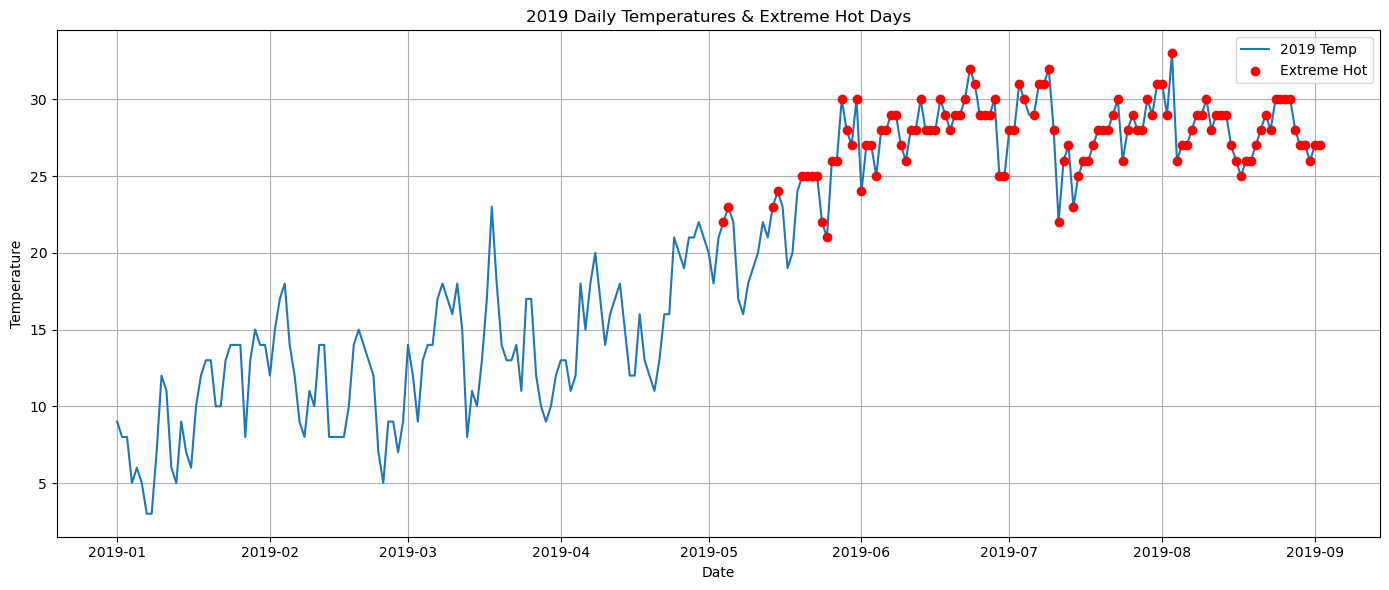

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df[df['year'] == 2019]['DateTime'], df[df['year'] == 2019]['MaxTemp'], label='2019 Temp')
plt.scatter(extreme_2019_max['DateTime'], extreme_2019_max['MaxTemp'], color='red', label='Extreme Hot', zorder=5)
plt.title("2019 Daily Temperatures & Extreme Hot Days")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
print(extreme_2019_min[['DateTime', 'MinTemp', 'min_temp_mean', 'min_temp_std', 'z_score_min']])

      DateTime  MinTemp  min_temp_mean  min_temp_std  z_score_min
0   2019-09-02       22       5.545455      3.387141     4.857945
1   2019-09-01       22       5.363636      3.775519     4.406378
2   2019-08-31       22       5.090909      3.080732     5.488660
3   2019-08-30       22       5.818182      2.272364     7.121139
4   2019-08-29       23       5.727273      2.611165     6.614951
..         ...      ...            ...           ...          ...
110 2019-05-15       17      10.090909      1.921174     3.596286
111 2019-05-14       15       9.545455      1.916436     2.846192
112 2019-05-13       15       9.727273      2.412091     2.185957
113 2019-05-12       16       9.454545      3.110101     2.104580
121 2019-05-04       17      12.272727      2.101947     2.248997

[113 rows x 5 columns]


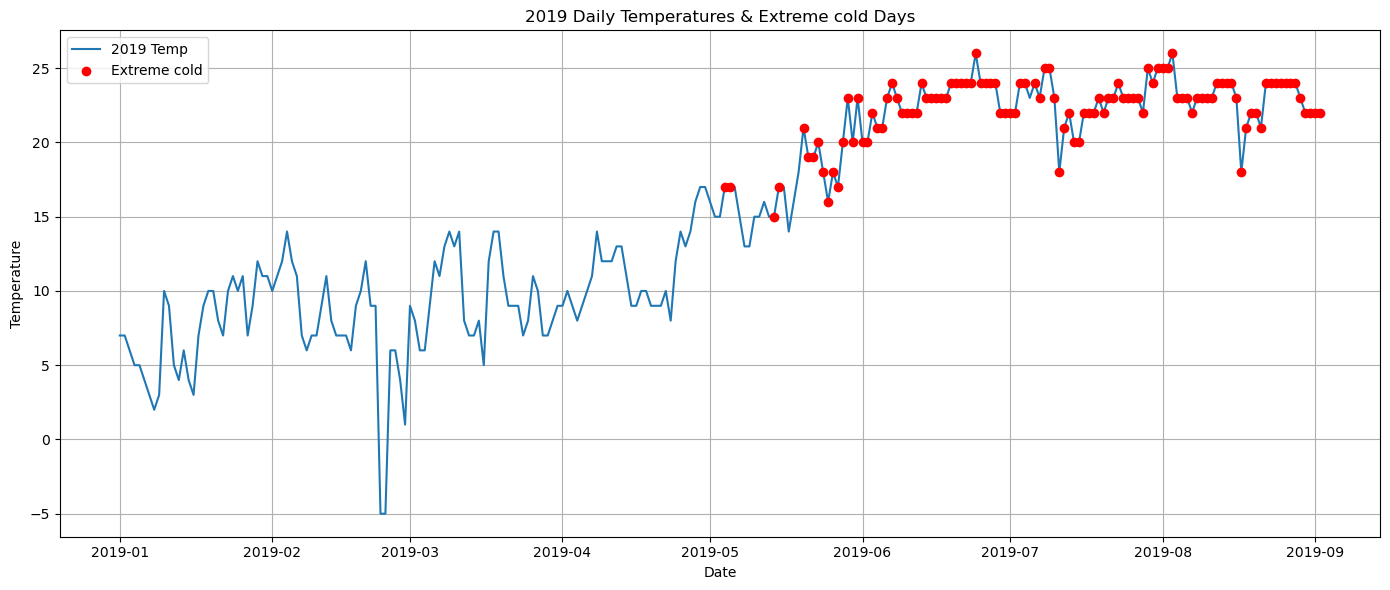

In [80]:
plt.figure(figsize=(14,6))
plt.plot(df[df['year'] == 2019]['DateTime'], df[df['year'] == 2019]['MinTemp'], label='2019 Temp')
plt.scatter(extreme_2019_max['DateTime'], extreme_2019_max['MinTemp'], color='red', label='Extreme cold', zorder=5)
plt.title("2019 Daily Temperatures & Extreme cold Days")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


yaz aylarında minimum ve maksimum sıcaklıklarda anormalliklerin daha sık gözlemlendiği söylenebilir 